In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 2018 Midterms

In [2]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#midterms since:2018-09-06 until:2018-11-06').get_items()):
    if i>4000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
tweets_df_2018 = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_10748/3828399178.py:8: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


In [3]:
tweets_df_2018

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,spyoung_MS,2018-11-05 23:59:53+00:00,0,Hearsay Social,"After the 2018 #midterms, if the dollar streng..."
1,nathanking,2018-11-05 23:59:52+00:00,4,Twitter for iPhone,'Twas the night before #Midterms when all thro...
2,MariaNicholasMS,2018-11-05 23:59:30+00:00,0,Hearsay Social,"After the 2018 #midterms, if the dollar streng..."
3,ScottOtteman,2018-11-05 23:59:13+00:00,4,Twitter for iPhone,Like watching the Dems trying to retake the Ho...
4,SpikeAndersonMS,2018-11-05 23:59:08+00:00,0,Hearsay Social,"After the 2018 #midterms, if the dollar streng..."
...,...,...,...,...,...
3996,densaer,2018-11-04 17:35:58+00:00,0,Twitter for iPad,These states allow you to register and vote on...
3997,Taoistguy457,2018-11-04 17:35:55+00:00,0,Twitter Web Client,Why is the WASH POST dedicated to attacking th...
3998,jon_ostrove,2018-11-04 17:35:55+00:00,2,Twitter for iPad,https://t.co/TUFIWR3Cf4 #trump #TrumpHumor #...
3999,Taoistguy457,2018-11-04 17:34:23+00:00,0,Twitter Web Client,Sunday Q.\n#QAnon\n#NPC\n#Midterms https://t.c...


# Topic Modeling - 2018 Midterms

In [ ]:
#! pip install gensim

In [4]:
import pandas as pd
#import preprocessor as p
import matplotlib
import nltk
import re
import math

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from datetime import datetime

In [5]:
tweets_df_2018

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,spyoung_MS,2018-11-05 23:59:53+00:00,0,Hearsay Social,"After the 2018 #midterms, if the dollar streng..."
1,nathanking,2018-11-05 23:59:52+00:00,4,Twitter for iPhone,'Twas the night before #Midterms when all thro...
2,MariaNicholasMS,2018-11-05 23:59:30+00:00,0,Hearsay Social,"After the 2018 #midterms, if the dollar streng..."
3,ScottOtteman,2018-11-05 23:59:13+00:00,4,Twitter for iPhone,Like watching the Dems trying to retake the Ho...
4,SpikeAndersonMS,2018-11-05 23:59:08+00:00,0,Hearsay Social,"After the 2018 #midterms, if the dollar streng..."
...,...,...,...,...,...
3996,densaer,2018-11-04 17:35:58+00:00,0,Twitter for iPad,These states allow you to register and vote on...
3997,Taoistguy457,2018-11-04 17:35:55+00:00,0,Twitter Web Client,Why is the WASH POST dedicated to attacking th...
3998,jon_ostrove,2018-11-04 17:35:55+00:00,2,Twitter for iPad,https://t.co/TUFIWR3Cf4 #trump #TrumpHumor #...
3999,Taoistguy457,2018-11-04 17:34:23+00:00,0,Twitter Web Client,Sunday Q.\n#QAnon\n#NPC\n#Midterms https://t.c...


In [6]:
tweets_2018 = tweets_df_2018[['Tweet']]

In [7]:
tweets_2018

,Tweet
0,"After the 2018 #midterms, if the dollar streng..."
1,'Twas the night before #Midterms when all thro...
2,"After the 2018 #midterms, if the dollar streng..."
3,Like watching the Dems trying to retake the Ho...
4,"After the 2018 #midterms, if the dollar streng..."
...,...
3996,These states allow you to register and vote on...
3997,Why is the WASH POST dedicated to attacking th...
3998,https://t.co/TUFIWR3Cf4 #trump #TrumpHumor #...
3999,Sunday Q.\n#QAnon\n#NPC\n#Midterms https://t.c...


In [8]:
tweets_2018['Tweet']

0       After the 2018 #midterms, if the dollar streng...
1       'Twas the night before #Midterms when all thro...
2       After the 2018 #midterms, if the dollar streng...
3       Like watching the Dems trying to retake the Ho...
4       After the 2018 #midterms, if the dollar streng...
                              ...                        
3996    These states allow you to register and vote on...
3997    Why is the WASH POST dedicated to attacking th...
3998    https://t.co/TUFIWR3Cf4 #trump #TrumpHumor   #...
3999    Sunday Q.\n#QAnon\n#NPC\n#Midterms https://t.c...
4000    .@CNNSotu Nov. 4 transcript https://t.co/IJjSR...
Name: Tweet, Length: 4001, dtype: object

In [11]:
#pip install tweet-preprocessor

In [9]:
import preprocessor as p

In [10]:
#import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [11]:
tweets_2018['Tweet'] = tweets_2018['Tweet'].apply(lambda x: clean_tweets(x))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_10748/1887199200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2018['Tweet'] = tweets_2018['Tweet'].apply(lambda x: clean_tweets(x))


In [12]:
tweets_2018

,Tweet
0,"After the 2018 #midterms, if the dollar streng..."
1,'Twas the night before #Midterms when all thro...
2,"After the 2018 #midterms, if the dollar streng..."
3,Like watching the Dems trying to retake the Ho...
4,"After the 2018 #midterms, if the dollar streng..."
...,...
3996,These states allow you to register and vote on...
3997,Why is the WASH POST dedicated to attacking th...
3998,#trump #TrumpHumor #PoliticalCartoon #Trump...
3999,Sunday Q.#QAnon#NPC#Midterms


In [16]:
#import nltk

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop = stopwords.words('english')
tweets_2018['Clean_Tweet'] = tweets_2018['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_10748/3211747727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2018['Clean_Tweet'] = tweets_2018['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [16]:
tweets_2018

,Tweet,Clean_Tweet
0,"After the 2018 #midterms, if the dollar streng...","After 2018 #midterms, dollar strengthens, coul..."
1,'Twas the night before #Midterms when all thro...,'Twas night #Midterms thro' White houseNot cre...
2,"After the 2018 #midterms, if the dollar streng...","After 2018 #midterms, dollar strengthens, coul..."
3,Like watching the Dems trying to retake the Ho...,Like watching Dems trying retake House tomorro...
4,"After the 2018 #midterms, if the dollar streng...","After 2018 #midterms, dollar strengthens, coul..."
...,...,...
3996,These states allow you to register and vote on...,These states allow register vote day. Democrac...
3997,Why is the WASH POST dedicated to attacking th...,Why WASH POST dedicated attacking movement?WAS...
3998,#trump #TrumpHumor #PoliticalCartoon #Trump...,#trump #TrumpHumor #PoliticalCartoon #TrumpTwe...
3999,Sunday Q.#QAnon#NPC#Midterms,Sunday Q.#QAnon#NPC#Midterms


In [17]:
for i in range(len(tweets_2018)):
    tweets_2018['Clean_Tweet'][i] = tweets_2018['Clean_Tweet'][i].lower()

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_10748/826628297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2018['Clean_Tweet'][i] = tweets_2018['Clean_Tweet'][i].lower()


In [18]:
tweets_2018

,Tweet,Clean_Tweet
0,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul..."
1,'Twas the night before #Midterms when all thro...,'twas night #midterms thro' white housenot cre...
2,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul..."
3,Like watching the Dems trying to retake the Ho...,like watching dems trying retake house tomorro...
4,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul..."
...,...,...
3996,These states allow you to register and vote on...,these states allow register vote day. democrac...
3997,Why is the WASH POST dedicated to attacking th...,why wash post dedicated attacking movement?was...
3998,#trump #TrumpHumor #PoliticalCartoon #Trump...,#trump #trumphumor #politicalcartoon #trumptwe...
3999,Sunday Q.#QAnon#NPC#Midterms,sunday q.#qanon#npc#midterms


In [19]:
import string

In [20]:
def remove_punct(txt):
    text_nopunct= "".join([char for char in txt if char not in string.punctuation])
    return text_nopunct
tweets_2018['Finished_Tweet']= tweets_2018['Clean_Tweet'].apply(lambda x: remove_punct(x))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_10748/2656053432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2018['Finished_Tweet']= tweets_2018['Clean_Tweet'].apply(lambda x: remove_punct(x))


In [21]:
tweets_2018

,Tweet,Clean_Tweet,Finished_Tweet
0,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...
1,'Twas the night before #Midterms when all thro...,'twas night #midterms thro' white housenot cre...,twas night midterms thro white housenot creatu...
2,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...
3,Like watching the Dems trying to retake the Ho...,like watching dems trying retake house tomorro...,like watching dems trying retake house tomorro...
4,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...
...,...,...,...
3996,These states allow you to register and vote on...,these states allow register vote day. democrac...,these states allow register vote day democracy...
3997,Why is the WASH POST dedicated to attacking th...,why wash post dedicated attacking movement?was...,why wash post dedicated attacking movementwash...
3998,#trump #TrumpHumor #PoliticalCartoon #Trump...,#trump #trumphumor #politicalcartoon #trumptwe...,trump trumphumor politicalcartoon trumptweets ...
3999,Sunday Q.#QAnon#NPC#Midterms,sunday q.#qanon#npc#midterms,sunday qqanonnpcmidterms


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
tweets_2018['tokenized_tweet'] = 0
for i in range(len(tweets_2018)):
    tweets_2018['tokenized_tweet'][i] = word_tokenize(tweets_2018['Finished_Tweet'][i])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_10748/1306934275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2018['tokenized_tweet'] = 0
C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_10748/1306934275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2018['tokenized_tweet'][i] = word_tokenize(tweets_2018['Finished_Tweet'][i])
C:\Users\hnourbakhsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [24]:
tweets_2018

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
1,'Twas the night before #Midterms when all thro...,'twas night #midterms thro' white housenot cre...,twas night midterms thro white housenot creatu...,"[twas, night, midterms, thro, white, housenot,..."
2,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
3,Like watching the Dems trying to retake the Ho...,like watching dems trying retake house tomorro...,like watching dems trying retake house tomorro...,"[like, watching, dems, trying, retake, house, ..."
4,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
...,...,...,...,...
3996,These states allow you to register and vote on...,these states allow register vote day. democrac...,these states allow register vote day democracy...,"[these, states, allow, register, vote, day, de..."
3997,Why is the WASH POST dedicated to attacking th...,why wash post dedicated attacking movement?was...,why wash post dedicated attacking movementwash...,"[why, wash, post, dedicated, attacking, moveme..."
3998,#trump #TrumpHumor #PoliticalCartoon #Trump...,#trump #trumphumor #politicalcartoon #trumptwe...,trump trumphumor politicalcartoon trumptweets ...,"[trump, trumphumor, politicalcartoon, trumptwe..."
3999,Sunday Q.#QAnon#NPC#Midterms,sunday q.#qanon#npc#midterms,sunday qqanonnpcmidterms,"[sunday, qqanonnpcmidterms]"


In [25]:
indices_to_drop = []
for i in range(len(tweets_2018)):
    if len(tweets_2018.tokenized_tweet[i]) == 0:
        indices_to_drop.append(tweets_2018.index[i])

tweets_2018 = tweets_2018.drop(indices_to_drop)
tweets_2018 = tweets_2018.reset_index(drop = True)
tweets_2018.head()

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
1,'Twas the night before #Midterms when all thro...,'twas night #midterms thro' white housenot cre...,twas night midterms thro white housenot creatu...,"[twas, night, midterms, thro, white, housenot,..."
2,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
3,Like watching the Dems trying to retake the Ho...,like watching dems trying retake house tomorro...,like watching dems trying retake house tomorro...,"[like, watching, dems, trying, retake, house, ..."
4,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."


In [26]:
tweets_2018

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
1,'Twas the night before #Midterms when all thro...,'twas night #midterms thro' white housenot cre...,twas night midterms thro white housenot creatu...,"[twas, night, midterms, thro, white, housenot,..."
2,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
3,Like watching the Dems trying to retake the Ho...,like watching dems trying retake house tomorro...,like watching dems trying retake house tomorro...,"[like, watching, dems, trying, retake, house, ..."
4,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, midterms, dollar, strengthens, c..."
...,...,...,...,...
3996,These states allow you to register and vote on...,these states allow register vote day. democrac...,these states allow register vote day democracy...,"[these, states, allow, register, vote, day, de..."
3997,Why is the WASH POST dedicated to attacking th...,why wash post dedicated attacking movement?was...,why wash post dedicated attacking movementwash...,"[why, wash, post, dedicated, attacking, moveme..."
3998,#trump #TrumpHumor #PoliticalCartoon #Trump...,#trump #trumphumor #politicalcartoon #trumptwe...,trump trumphumor politicalcartoon trumptweets ...,"[trump, trumphumor, politicalcartoon, trumptwe..."
3999,Sunday Q.#QAnon#NPC#Midterms,sunday q.#qanon#npc#midterms,sunday qqanonnpcmidterms,"[sunday, qqanonnpcmidterms]"


In [27]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([word for tweets_2018 in tweets_2018.tokenized_tweet for word in tweets_2018],100)

[('midterms', 3872),
 ('vote', 1707),
 ('midterms2018', 569),
 ('trump', 491),
 ('election', 375),
 ('us', 345),
 ('tomorrow', 340),
 ('bluewave', 337),
 ('the', 334),
 ('voteblue', 333),
 ('electionday', 329),
 ('amp', 319),
 ('democrats', 273),
 ('midtermelections', 272),
 ('voting', 260),
 ('elections', 255),
 ('de', 252),
 ('news', 235),
 ('2018', 222),
 ('it', 212),
 ('get', 210),
 ('day', 206),
 ('you', 196),
 ('people', 181),
 ('could', 176),
 ('election2018', 173),
 ('resist', 165),
 ('we', 165),
 ('via', 162),
 ('america', 161),
 ('make', 160),
 ('go', 159),
 ('this', 152),
 ('politics', 151),
 ('bluewave2018', 151),
 ('republicans', 151),
 ('read', 148),
 ('midterm', 148),
 ('usa', 147),
 ('polls', 145),
 ('more', 144),
 ('like', 143),
 ('votebluetosaveamerica', 137),
 ('votedem', 137),
 ('markets', 136),
 ('beavoter', 131),
 ('tuesday', 131),
 ('after', 130),
 ('electioneve', 130),
 ('if', 129),
 ('one', 127),
 ('higher', 126),
 ('time', 126),
 ('sign', 124),
 ('voters', 124

In [28]:
words_list = get_most_freq_words([word for tweet_2018 in tweets_2018.tokenized_tweet for word in tweet_2018],100)
words_list

[('midterms', 3872),
 ('vote', 1707),
 ('midterms2018', 569),
 ('trump', 491),
 ('election', 375),
 ('us', 345),
 ('tomorrow', 340),
 ('bluewave', 337),
 ('the', 334),
 ('voteblue', 333),
 ('electionday', 329),
 ('amp', 319),
 ('democrats', 273),
 ('midtermelections', 272),
 ('voting', 260),
 ('elections', 255),
 ('de', 252),
 ('news', 235),
 ('2018', 222),
 ('it', 212),
 ('get', 210),
 ('day', 206),
 ('you', 196),
 ('people', 181),
 ('could', 176),
 ('election2018', 173),
 ('resist', 165),
 ('we', 165),
 ('via', 162),
 ('america', 161),
 ('make', 160),
 ('go', 159),
 ('this', 152),
 ('politics', 151),
 ('bluewave2018', 151),
 ('republicans', 151),
 ('read', 148),
 ('midterm', 148),
 ('usa', 147),
 ('polls', 145),
 ('more', 144),
 ('like', 143),
 ('votebluetosaveamerica', 137),
 ('votedem', 137),
 ('markets', 136),
 ('beavoter', 131),
 ('tuesday', 131),
 ('after', 130),
 ('electioneve', 130),
 ('if', 129),
 ('one', 127),
 ('higher', 126),
 ('time', 126),
 ('sign', 124),
 ('voters', 124

In [29]:
strings_list = []
for i in words_list:
    for j in i:
        if type(j) == str:
            strings_list.append(j)

In [30]:
strings_list

['midterms',
 'vote',
 'midterms2018',
 'trump',
 'election',
 'us',
 'tomorrow',
 'bluewave',
 'the',
 'voteblue',
 'electionday',
 'amp',
 'democrats',
 'midtermelections',
 'voting',
 'elections',
 'de',
 'news',
 '2018',
 'it',
 'get',
 'day',
 'you',
 'people',
 'could',
 'election2018',
 'resist',
 'we',
 'via',
 'america',
 'make',
 'go',
 'this',
 'politics',
 'bluewave2018',
 'republicans',
 'read',
 'midterm',
 'usa',
 'polls',
 'more',
 'like',
 'votebluetosaveamerica',
 'votedem',
 'markets',
 'beavoter',
 'tuesday',
 'after',
 'electioneve',
 'if',
 'one',
 'higher',
 'time',
 'sign',
 'voters',
 'maga',
 'in',
 'dollar',
 'anticipate',
 'fiscal',
 'en',
 'to',
 'gop',
 'strengthens',
 'stimulus',
 'interestrates',
 'house',
 'midtermelections2018',
 'please',
 'voter',
 'right',
 'metoo',
 'electionday2018',
 'don',
 'la',
 'gotv',
 'know',
 'and',
 'senate',
 'what',
 'votetuesday',
 'voted',
 'republican',
 'mondaymotivation',
 'new',
 'american',
 'political',
 'today'

In [ ]:
# Continue

In [33]:
#words_to_keep = ['obama', 'vote', 'gop', 'senate', 'democrats', 'republicans', 'right', 'la', 'voteblue', 'polls', 
 #               'coffee', 'ebola', 'candidates', 'race', 'tuesday', 'issues', 'black', 'win', 'school', 'usa', 'dems']

In [34]:
#for i in strings_list:
 #   if i not in words_to_keep:
  #      strings_list.remove(i)

In [31]:
strings_list

['midterms',
 'vote',
 'midterms2018',
 'trump',
 'election',
 'us',
 'tomorrow',
 'bluewave',
 'the',
 'voteblue',
 'electionday',
 'amp',
 'democrats',
 'midtermelections',
 'voting',
 'elections',
 'de',
 'news',
 '2018',
 'it',
 'get',
 'day',
 'you',
 'people',
 'could',
 'election2018',
 'resist',
 'we',
 'via',
 'america',
 'make',
 'go',
 'this',
 'politics',
 'bluewave2018',
 'republicans',
 'read',
 'midterm',
 'usa',
 'polls',
 'more',
 'like',
 'votebluetosaveamerica',
 'votedem',
 'markets',
 'beavoter',
 'tuesday',
 'after',
 'electioneve',
 'if',
 'one',
 'higher',
 'time',
 'sign',
 'voters',
 'maga',
 'in',
 'dollar',
 'anticipate',
 'fiscal',
 'en',
 'to',
 'gop',
 'strengthens',
 'stimulus',
 'interestrates',
 'house',
 'midtermelections2018',
 'please',
 'voter',
 'right',
 'metoo',
 'electionday2018',
 'don',
 'la',
 'gotv',
 'know',
 'and',
 'senate',
 'what',
 'votetuesday',
 'voted',
 'republican',
 'mondaymotivation',
 'new',
 'american',
 'political',
 'today'

In [32]:
words_list

[('midterms', 3872),
 ('vote', 1707),
 ('midterms2018', 569),
 ('trump', 491),
 ('election', 375),
 ('us', 345),
 ('tomorrow', 340),
 ('bluewave', 337),
 ('the', 334),
 ('voteblue', 333),
 ('electionday', 329),
 ('amp', 319),
 ('democrats', 273),
 ('midtermelections', 272),
 ('voting', 260),
 ('elections', 255),
 ('de', 252),
 ('news', 235),
 ('2018', 222),
 ('it', 212),
 ('get', 210),
 ('day', 206),
 ('you', 196),
 ('people', 181),
 ('could', 176),
 ('election2018', 173),
 ('resist', 165),
 ('we', 165),
 ('via', 162),
 ('america', 161),
 ('make', 160),
 ('go', 159),
 ('this', 152),
 ('politics', 151),
 ('bluewave2018', 151),
 ('republicans', 151),
 ('read', 148),
 ('midterm', 148),
 ('usa', 147),
 ('polls', 145),
 ('more', 144),
 ('like', 143),
 ('votebluetosaveamerica', 137),
 ('votedem', 137),
 ('markets', 136),
 ('beavoter', 131),
 ('tuesday', 131),
 ('after', 130),
 ('electioneve', 130),
 ('if', 129),
 ('one', 127),
 ('higher', 126),
 ('time', 126),
 ('sign', 124),
 ('voters', 124

In [33]:
words = ['midterms', 'midterms2018', 'the', 'midtermelections', 'elections', 'it', 'get', 'de', 'you', 'people', 
        'could', 'election2018', 'we', 'this', 'midterm', 'like', 'if', 'one', 'voters', 'in', 'en', 'to', 'midtermelections2018', 
        'and', 'what', 'vote', 'voter', 'voted', 're']

In [35]:
for i in range(len(tweets_2018)):
    tweets_2018.tokenized_tweet[i] = [x for x in tweets_2018.tokenized_tweet[i] if x not in words]

tweets_2018.head()

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, dollar, strengthens, sign, marke..."
1,'Twas the night before #Midterms when all thro...,'twas night #midterms thro' white housenot cre...,twas night midterms thro white housenot creatu...,"[twas, night, thro, white, housenot, creature,..."
2,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, dollar, strengthens, sign, marke..."
3,Like watching the Dems trying to retake the Ho...,like watching dems trying retake house tomorro...,like watching dems trying retake house tomorro...,"[watching, dems, trying, retake, house, tomorr..."
4,"After the 2018 #midterms, if the dollar streng...","after 2018 #midterms, dollar strengthens, coul...",after 2018 midterms dollar strengthens could s...,"[after, 2018, dollar, strengthens, sign, marke..."


In [36]:
tweets_2018_dictionary = Dictionary(tweets_2018.tokenized_tweet)

In [37]:
tweets_2018_corpus = [tweets_2018_dictionary.doc2bow(tweet) for tweet in tweets_2018.tokenized_tweet]

In [38]:
tweets_2018_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(17, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)],
 [(14, 1), (21, 1), (24, 1), (50, 1), (51, 1), (52, 1)

# One way

In [39]:
import gensim
from gensim.models import ldamulticore
from pprint import pprint
from gensim.models import coherencemodel

for k in range(2,20): # Train LDA on different values of k
    print('Round: '+str(k))
    LDA = gensim.models.ldamulticore.LdaMulticore
    ldamodel = LDA(tweets_2014_corpus, num_topics=k, id2word = tweets_2014_dictionary, passes=20, iterations=100,
                   chunksize = 10000, eval_every = 10, random_state=0)
    ldamodel.save(f"ldamodel_for_{k}topics_Run_10")
    pprint(ldamodel.print_topics())

coherence = []
for k in range(2,20):
    LDA = gensim.models.ldamulticore.LdaMulticore
    ldamodel = LDA.load(f"ldamodel_for_{k}topics_Run_10")
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=tweets_2014_corpus, dictionary=tweets_2014_dictionary, coherence='c_v')
    coherence.append((k, 'default', 'default', cm.get_coherence()))

# Other way

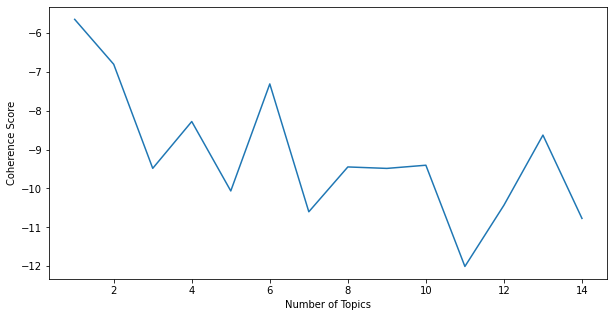

In [41]:
tweets_coherence = []
for nb_topics in range(1,15):
    lda = LdaModel(tweets_2018_corpus, num_topics = nb_topics, id2word = tweets_2018_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_2018_corpus, dictionary=tweets_2018_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,15),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [47]:
k = 6
tweets_lda = LdaModel(tweets_2018_corpus, num_topics = k, id2word = tweets_2018_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

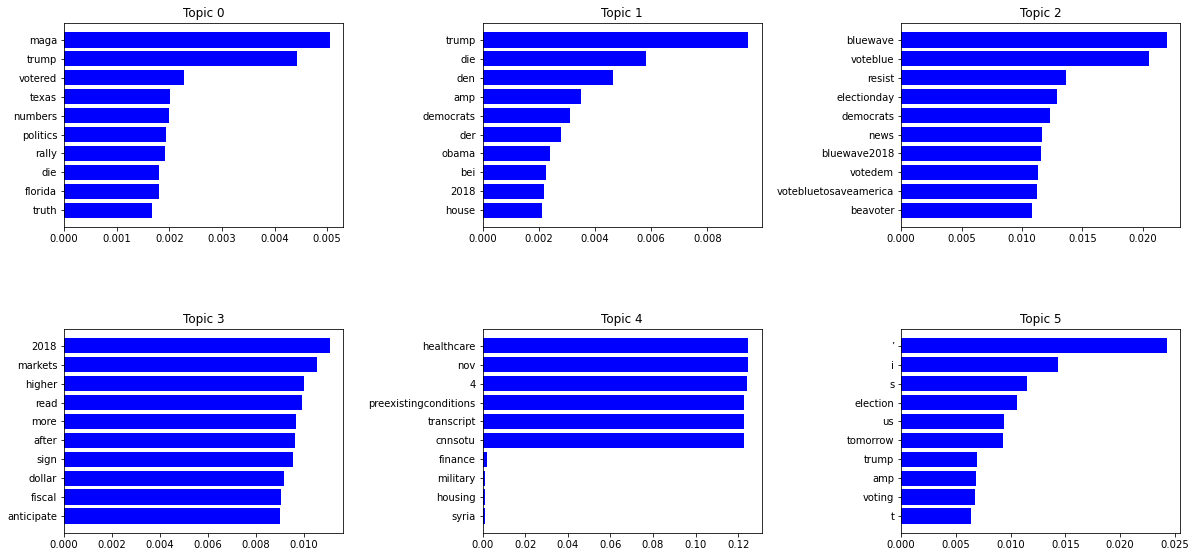

In [48]:
from matplotlib import gridspec
plot_top_words()